In [1]:
'''Clustering tasks''' 
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
'''Task2 - To group products with delivery delay, review score and product category and see correlation between features.'''

''' Read orders dataset '''
orders_df = pd.read_csv('D:\IML Assignments\project\CS412_IML/data/olist_orders_dataset.csv')
orders_df = orders_df[['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date']]

In [3]:
orders_df['delay'] = pd.to_datetime(orders_df['order_estimated_delivery_date']) - pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['delay'] = orders_df['delay'].dt.days
orders_df = orders_df.drop(['order_estimated_delivery_date','order_delivered_customer_date'],axis=1)
orders_df = orders_df.dropna()


In [4]:
''' Read order items dataset '''
order_items_df = pd.read_csv('D:\IML Assignments\project\CS412_IML/data/olist_order_items_dataset.csv')
order_items_df = order_items_df[['order_id', 'product_id', 'price','seller_id']]
#order_items_df.head()

In [5]:
''' Read products dataset '''
products_df = pd.read_csv('D:\IML Assignments\project\CS412_IML/data/olist_products_dataset.csv')
products_df = products_df[['product_id', 'product_category_name']]
#products_df.head()

In [ ]:
''' Read order reviews '''
reviews_df = pd.read_csv('D:\IML Assignments\project\CS412_IML/data/olist_order_reviews_dataset.csv')
reviews_df = reviews_df[['order_id', 'review_score']]
#reviews_df.head()

In [26]:
reviews_df['review_score'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [7]:
''' Read seller dataset '''
sellers_df = pd.read_csv('D:\IML Assignments\project\CS412_IML/data/olist_sellers_dataset.csv')
sellers_df = sellers_df[['seller_id', 'seller_zip_code_prefix']]
#sellers_df.head()

In [30]:
''' Merge orders and order reviews'''
order_reviews_df = pd.merge(orders_df,reviews_df, on = "order_id")

''' Merge order items and sellers '''
order_items_sellers_df = pd.merge(order_items_df, sellers_df, on= "seller_id")

''' Merge with order items '''
order_items_reviews_df = pd.merge(order_reviews_df, order_items_sellers_df, on= "order_id")

''' Merge with product '''
order_items_products_df = pd.merge(order_items_reviews_df, products_df, on= "product_id")
#order_items_products_df.head()

order_items_products_df = order_items_products_df.drop(['order_id','seller_id'], axis=1)

In [31]:
''' Perform label encoding '''
le = LabelEncoder()
order_items_products_df['product_category_name'] = le.fit_transform(order_items_products_df['product_category_name'].astype(str))
order_items_products_df[['product_id','seller_zip_code_prefix']] = order_items_products_df[['product_id','seller_zip_code_prefix']].apply(LabelEncoder().fit_transform)

In [32]:
''' Scaling the features before performing clustering '''

order_items_products_df = order_items_products_df.dropna()
ss = StandardScaler()
scaled_order_items_products = ss.fit_transform(order_items_products_df)

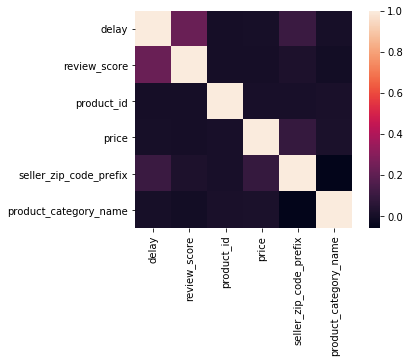

In [22]:
cor = order_items_products_df.corr() 
sns.heatmap(cor, square = True)

In [34]:
''' Kmeans'''
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [35]:
''' Perform Kmeans clustering'''

#scaled_order_items_products_df = pd.DataFrame(scaled_order_items_products, columns=cols)
clust_labels, cent = doKmeans(order_items_products_df, 8)
kmeans = pd.DataFrame(clust_labels)
order_items_products_df.insert((order_items_products_df.shape[1]),'cluster',kmeans)

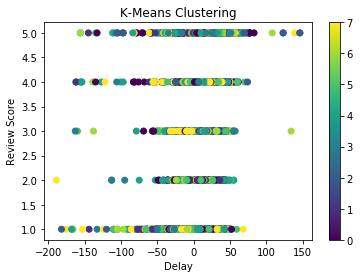

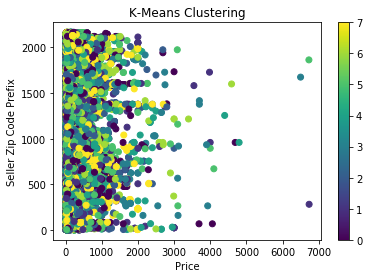

In [37]:
''' Plot the clusters obtained using k means'''
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(order_items_products_df['delay'],order_items_products_df['review_score'],
                     c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Delay')
ax.set_ylabel('Review Score')
plt.colorbar(scatter)

fig2 = plt.figure()
ax = fig2.add_subplot(111)
scatter = ax.scatter(order_items_products_df['price'],order_items_products_df['seller_zip_code_prefix'],
                     c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('Seller Zip Code Prefix')
plt.colorbar(scatter)